# **graphrag_tagger Demo**

*A lightweight toolkit for extracting topics from PDFs and visualizing their connections using graphs.*

## **1. Installation & Setup**
Ensure you have Python installed, then install the package locally:

```bash
pip install graphrag-tagger
```

In [ ]:
#pip install graphrag-tagger

Install all the **Core Dependecies**
- **PyMuPDF** – Extracts text from PDF files.
- **scikit-learn & ktrain** – Performs topic modeling.
- **LLM Client** – Enhances and refines extracted topics.
- **networkx** – Constructs and analyzes graphs.

```bash
pip install pymupdf scikit-learn ktrain llm networkx pytest
```

In [1]:
#pip install pymupdf scikit-learn ktrain llm networkx pytest

Load all the dependencies

## **2. Basic Usage**

Load a sample PDF document

In [53]:
#import the tagger module from the graphrag_tagger package
from graphrag_tagger import tagger

# A sample PDF document Graph Retrieval-Augmented Generation: A Survey availabe at https://arxiv.org/pdf/2408.08921v2
# Define sample parameters
params = {
    'pdf_folder': 'Sample PDf',  # update path to your PDF folder
    'chunk_size': 256,
    'chunk_overlap': 25,
    'n_components': None,
    'n_features': 512,
    'min_df': 2,
    'max_df': 0.95,
    'llm_model': 'ollama:qwen2.5',
    'output_folder': 'results',  # update path to your output folder
    'model_choice': 'sk' # kt for ktrain or sk for scikit-learn
}


c:\Users\hp\Desktop\Open-Source-Contributions\venv1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


For Fix regarding ```ModuleNotFoundError``` for ```distutils``` for python versions above ```python 3.12``` see [Fix ```distutils``` ModuleNotFoundError](distutilsModuleErrorFix.md)

In [ ]:
# # Create output folder if it doesn't exist
import os
os.makedirs(params['output_folder'], exist_ok=True)

# # Run the tagging pipeline
tagger.main(params)

['Graph Retrieval-Augmented Generation: A Survey\nBOCI PENG∗, School of Intelligence Science and Technology, Peking University, China\nYUN ZHU∗, College of Computer Science and Technology, Zhejiang University, China\nYONGCHAO LIU, Ant Group, China\nXIAOHE BO, Gaoling School of Artificial Intelligence, Renmin University of China, China\nHAIZHOU SHI, Rutgers University, US\nCHUNTAO HONG, Ant Group, China\nYAN ZHANG†, School of Intelligence Science and Technology, Peking University, China\nSILIANG TANG, College of Computer Science and Technology, Zhejiang University, China\nRecently, Retrieval-Augmented Generation (RAG) has achieved remarkable success in addressing the challenges\nof Large Language Models (LLMs) without necessitating retraining. By referencing an external knowledge\nbase, RAG refines LLM outputs, effectively mitigating issues such as “hallucination”, lack of domain-specific\nknowledge, and outdated information. However, the complex structure of relationships among differe

Generating Tags: 100%|██████████| 191/191 [28:01<00:00,  8.80s/it]

Saved 191 chunk files to results


You can use any LLM available online for this demo we are using Ollama qwen2.5

for ```Ollama``` ```ConnectionError```  
Install and Setup Ollama from [Ollama Repo](https://github.com/ollama/ollama) and download the model **qwen2.5** for this demo code using 
```bash
ollama pull qwen2.5
```

## **3. Topic Extraction & Refinement**

In [55]:
from glob import glob

files = glob(os.path.join(params["output_folder"], "chunk_*.json"))
len(files)

191

In [56]:
import json

raws: list[dict] = [json.load(open(file,encoding='utf-8')) for file in files]

for i, raw in enumerate(raws):
    if "chunk" not in raw:
        print(i, raw)
raw

{'chunk': 'scenarios such as intelligence report generation [139], patent phrase similarity detection [133] and software understanding [1]. Ranade and Joshi [139] first construct an Event Plot Graph (EPG) and retrieve the critical aspects of the events to aid the generation of intelligence reports. Peng and Yang [133] create a patent-phrase graph and retrieve the ego network of the given patent phrase to assist the judgment of phrase similarity. Alhanahnah et al. [1] propose a Chatbot to understand properties about dependencies in a given software package, which first automatically constructs the dependency graph and then the user can ask questions about the dependencies in the dependency graph.\n9.3\nBenchmarks and Metrics 9.3.1\nBenchmarks. The benchmarks used to evaluate the performance of the GraphRAG system can be divided into two categories. The first category is the corresponding datasets of downstream tasks. We summarize the benchmarks and papers tested with them according to t

In [57]:
import json

raws: list[dict] = [json.load(open(file,encoding='utf-8')) for file in files]
raws = [{
    "chunk": raw["chunk"],
    "source_file": raw["source_file"],
    "chunk_file": file,
    **raw["classification"],
} for file, raw in zip(files, raws)]

print(raws[0].keys(),"\n")
print(raws[0]["chunk"])

dict_keys(['chunk', 'source_file', 'chunk_file', 'content_type', 'is_sufficient', 'topics']) 

Graph Retrieval-Augmented Generation: A Survey
BOCI PENG∗, School of Intelligence Science and Technology, Peking University, China
YUN ZHU∗, College of Computer Science and Technology, Zhejiang University, China
YONGCHAO LIU, Ant Group, China
XIAOHE BO, Gaoling School of Artificial Intelligence, Renmin University of China, China
HAIZHOU SHI, Rutgers University, US
CHUNTAO HONG, Ant Group, China
YAN ZHANG†, School of Intelligence Science and Technology, Peking University, China
SILIANG TANG, College of Computer Science and Technology, Zhejiang University, China
Recently, Retrieval-Augmented Generation (RAG) has achieved remarkable success in addressing the challenges of Large Language Models (LLMs) without necessitating retraining. By referencing an external knowledge base, RAG refines LLM outputs, effectively mitigating issues such as “hallucination”, lack of domain-specific knowledge, and ou

In [58]:
import pandas as pd

chunk_classification = pd.DataFrame(raws)

chunk_classification

,chunk,source_file,chunk_file,content_type,is_sufficient,topics
0,Graph Retrieval-Augmented Generation: A Survey...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_1.json,paragraph,True,"[Topic 9, Topic 4, Topic 11]"
1,"begin by introducing the GraphRAG workflow, al...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_10.json,paragraph,True,"[Topic 3, Topic 5, Topic 9]"
2,marks specifically designed for the GraphRAG s...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_100.json,paragraph,True,"[Topic 9, Topic 1, Topic 4]"
3,"111:28\nPeng et al.\nLLMs with graphs, which c...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_101.json,paragraph,True,"[Topic 4, Topic 9, Topic 11]"
4,"such as QA systems, metrics like BLEU, ROUGE-L...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_102.json,paragraph,True,"[Topic 3, Topic 9]"
...,...,...,...,...,...,...
186,application scenarios for its outstanding abil...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_95.json,paragraph,True,"[Topic 4, Topic 9, Topic 11]"
187,"9.2.2\nBiomedical. Recently, GraphRAG techniqu...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_96.json,paragraph,True,"[Topic 1, Topic 9]"
188,Graph Retrieval-Augmented Generation: A Survey...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_97.json,paragraph,True,"[Topic 3, Topic 4, Topic 9]"
189,"academic exploration, including predicting pot...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_98.json,paragraph,True,"[Topic 4, Topic 9, Topic 11]"


In [59]:
# Getting the list of extracted topics
extracted_topics = json.load(open("results/topics.json",encoding='utf-8'))["topics"]

# Mapping the topic ids provided by the LLM to the corresponding topic names saved in the topics.json file
def map_topics(topic_ids):
    return [extracted_topics[int(topic.split()[1])-1] for topic in topic_ids if topic not in extracted_topics and "Topic " in topic]

chunk_classification['extracted_topics'] = chunk_classification['topics'].map(map_topics)
chunk_classification

,chunk,source_file,chunk_file,content_type,is_sufficient,topics,extracted_topics
0,Graph Retrieval-Augmented Generation: A Survey...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_1.json,paragraph,True,"[Topic 9, Topic 4, Topic 11]","[RAG Systems, Knowledge Graphs, Natural Langua..."
1,"begin by introducing the GraphRAG workflow, al...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_10.json,paragraph,True,"[Topic 3, Topic 5, Topic 9]","[Retrieval Techniques, Training Methods, RAG S..."
2,marks specifically designed for the GraphRAG s...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_100.json,paragraph,True,"[Topic 9, Topic 1, Topic 4]","[RAG Systems, Graph Neural Networks, Knowledge..."
3,"111:28\nPeng et al.\nLLMs with graphs, which c...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_101.json,paragraph,True,"[Topic 4, Topic 9, Topic 11]","[Knowledge Graphs, RAG Systems, Natural Langua..."
4,"such as QA systems, metrics like BLEU, ROUGE-L...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_102.json,paragraph,True,"[Topic 3, Topic 9]","[Retrieval Techniques, RAG Systems]"
...,...,...,...,...,...,...,...
186,application scenarios for its outstanding abil...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_95.json,paragraph,True,"[Topic 4, Topic 9, Topic 11]","[Knowledge Graphs, RAG Systems, Natural Langua..."
187,"9.2.2\nBiomedical. Recently, GraphRAG techniqu...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_96.json,paragraph,True,"[Topic 1, Topic 9]","[Graph Neural Networks, RAG Systems]"
188,Graph Retrieval-Augmented Generation: A Survey...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_97.json,paragraph,True,"[Topic 3, Topic 4, Topic 9]","[Retrieval Techniques, Knowledge Graphs, RAG S..."
189,"academic exploration, including predicting pot...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_98.json,paragraph,True,"[Topic 4, Topic 9, Topic 11]","[Knowledge Graphs, RAG Systems, Natural Langua..."


In [10]:
# Though the main method of the tagger module uses LLM prompt to extract clean topics from the Chunk files you can explicitely use the LLM.clean_topics
from graphrag_tagger.chat.llm import LLM, LLMService

# Initialize the LLM you want to use
llm_service = LLMService(model="ollama:qwen2.5")
llm = LLM(llm_service=llm_service) 

clean_topics = chunk_classification['extracted_topics'].map(llm.clean_topics)
print(clean_topics)
chunk_classification


Error parsing fallback JSON block: Extra data: line 1 column 22 (char 21)


KeyboardInterrupt: 

## **4. Graph Construction & Visualization**


In [ ]:
import os
import pytest
from graphrag_tagger.build_graph import process_graph



# Define sample input and output folders
input_folder = (
    "results"  # update this path to your folder containing JSON files
)
output_folder = (
    "graph_outputs"    # update this path where you want your result to be stored
)

# # Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process graph with a specified threshold percentile (e.g., 97.5)
graph = process_graph(
    input_folder,
    output_folder,
    threshold_percentile=97.5,
    content_type_filter="paragraph", # Use only paragraph for chunk graph builder
)


# # The processed graph is stored in 'graph' and the connected components map is saved to the output folder.
print("Graph processing completed.")


Processing graph...
Found 191 files in results.
Filtering by content type: paragraph


Loading raw files: 100%|██████████| 191/191 [00:04<00:00, 44.82it/s]


Loaded 118 raw documents.
Computing scores...
Scores computed.
Building graph...


Building nodes & edges: 100%|██████████| 118/118 [00:00<00:00, 4046.44it/s]

Graph built. Nodes: 118 Edges: 4668
Starting graph pruning...
Min weight: 2.2488456511281325
Max weight: 11.660463380858701
Mean weight: 4.54146990227655
Median weight: 4.123632859289627
Pruning threshold (97.5th percentile): 9.207397336926359
Removing 4550 edges out of 4668...
Graph pruned. Nodes: 118 Edges: 118
Computing connected components...
Number of connected components: 79
Component sizes (min, max, mean): 1 12 1.4936708860759493
Connected components map saved to graph_outputs\connected_components.json
Graph processing complete.
Graph processing completed.


In [4]:
import json
import os
output_folder = (
    "graph_outputs"    # update this path where you want your result to be stored
)
graph_edges: dict = json.load(open(os.path.join(output_folder, "connected_components.json")))
graph_edges

{'0': 0,
 '1': 1,
 '107': 1,
 '25': 2,
 '2': 2,
 '29': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '65': 6,
 '34': 6,
 '97': 6,
 '69': 6,
 '6': 6,
 '40': 6,
 '76': 6,
 '13': 6,
 '15': 6,
 '50': 6,
 '115': 6,
 '30': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10': 10,
 '11': 11,
 '12': 12,
 '14': 13,
 '16': 14,
 '17': 15,
 '18': 16,
 '20': 16,
 '96': 17,
 '91': 17,
 '78': 17,
 '79': 17,
 '82': 17,
 '19': 17,
 '89': 17,
 '90': 17,
 '27': 17,
 '21': 18,
 '22': 19,
 '23': 20,
 '24': 21,
 '26': 22,
 '72': 23,
 '28': 23,
 '95': 23,
 '31': 24,
 '32': 25,
 '33': 26,
 '35': 27,
 '36': 28,
 '37': 29,
 '38': 30,
 '39': 31,
 '41': 32,
 '42': 33,
 '43': 34,
 '44': 35,
 '45': 36,
 '46': 37,
 '73': 38,
 '53': 38,
 '47': 38,
 '48': 39,
 '49': 40,
 '51': 41,
 '59': 42,
 '52': 42,
 '86': 43,
 '92': 43,
 '54': 43,
 '55': 44,
 '56': 45,
 '57': 46,
 '58': 47,
 '60': 48,
 '61': 49,
 '71': 49,
 '110': 50,
 '67': 50,
 '68': 50,
 '62': 50,
 '63': 51,
 '64': 52,
 '80': 52,
 '66': 53,
 '70': 54,
 '74': 55,
 '75': 56,
 '106': 57,
 '99': 

In [5]:

connected_chunks = {}
for k,v in graph_edges.items():
    if v in connected_chunks:
        connected_chunks[v].append(int(k))
    else:
        connected_chunks[v] = [int(k)]
connected_chunks

{0: [0],
 1: [1, 107],
 2: [25, 2, 29],
 3: [3],
 4: [4],
 5: [5],
 6: [65, 34, 97, 69, 6, 40, 76, 13, 15, 50, 115, 30],
 7: [7],
 8: [8],
 9: [9],
 10: [10],
 11: [11],
 12: [12],
 13: [14],
 14: [16],
 15: [17],
 16: [18, 20],
 17: [96, 91, 78, 79, 82, 19, 89, 90, 27],
 18: [21],
 19: [22],
 20: [23],
 21: [24],
 22: [26],
 23: [72, 28, 95],
 24: [31],
 25: [32],
 26: [33],
 27: [35],
 28: [36],
 29: [37],
 30: [38],
 31: [39],
 32: [41],
 33: [42],
 34: [43],
 35: [44],
 36: [45],
 37: [46],
 38: [73, 53, 47],
 39: [48],
 40: [49],
 41: [51],
 42: [59, 52],
 43: [86, 92, 54],
 44: [55],
 45: [56],
 46: [57],
 47: [58],
 48: [60],
 49: [61, 71],
 50: [110, 67, 68, 62],
 51: [63],
 52: [64, 80],
 53: [66],
 54: [70],
 55: [74],
 56: [75],
 57: [106, 99, 77],
 58: [81],
 59: [83],
 60: [84],
 61: [85],
 62: [87],
 63: [88],
 64: [93],
 65: [94],
 66: [98],
 67: [100],
 68: [101],
 69: [105, 102],
 70: [104, 103],
 71: [108],
 72: [109],
 73: [111],
 74: [112],
 75: [113],
 76: [114],
 

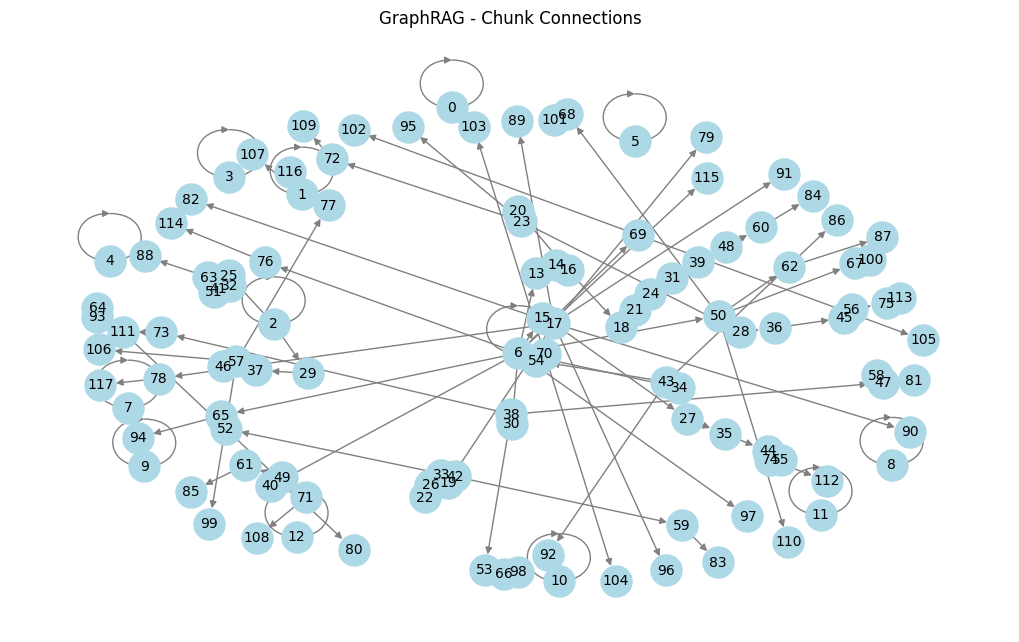

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample graph adjacency list (your provided data)

# Create a Graph object
G = nx.DiGraph()

# Add edges based on the adjacency list
for parent, children in connected_chunks.items():
    for child in children:
        G.add_edge(parent, child)  # Connect parent to each child

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10)

plt.title("GraphRAG - Chunk Connections")
plt.show()


In [67]:
from pyvis.network import Network

# Initialize Pyvis Network
net = Network(notebook=True, height="600px", width="100%", bgcolor="#222222", font_color="white",directed=True)

# Add nodes & edges
for parent, children in connected_chunks.items():
    net.add_node(parent, label=f"Chunk {parent}", color="red",title=chunk_classification["extracted_topics"].iloc[parent])  # Parent nodes
    for child in children:
        if parent != child:  # Avoid self-edges
            net.add_node(child, label=f"Chunk {child}", color="lightblue",title=chunk_classification["extracted_topics"].iloc[parent])  # Child nodes
            net.add_edge(parent, child)  # Connect edges
# Save and Display
net.force_atlas_2based()
net.write_html("graph.html")
os.startfile("graph.html")
